In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as smp
import numpy as np

In [75]:
with open("RegressionResults/all_results_log_expand-Japan.pkl", "rb") as file:
    data = pickle.load(file)

In [77]:
true_data = pd.read_csv(f"RealData/data/Japan-Mx_1x1.txt", delim_whitespace=True)
true_data["Age"] = true_data["Age"].map(lambda x: 110 if x == "110+" else x)
true_data.Age = true_data.Age.astype("int")
true_data

C:\Users\guilherme\AppData\Local\Temp\ipykernel_7584\3095399179.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  true_data = pd.read_csv(f"RealData/data/Japan-Mx_1x1.txt", delim_whitespace=True)


,Year,Age,Female,Male,Total
0,1947,0,0.083659,0.095519,0.089713
1,1947,1,0.035671,0.037045,0.036368
2,1947,2,0.017285,0.017216,0.017250
3,1947,3,0.011235,0.011339,0.011288
4,1947,4,0.007028,0.007474,0.007253
...,...,...,...,...,...
8542,2023,106,0.548238,0.609214,0.552960
8543,2023,107,0.621928,0.775749,0.632380
8544,2023,108,0.570716,0.630923,0.574458
8545,2023,109,0.680962,1.008218,0.697016


In [76]:
data

,iteration,Year,Total,Female,Male,Country
0,0,1992,0.08442218*x0 - 9.467543,0.093031*x0 - 10.292331,35.858215*x0**2/((x0 - 13.7187)*(x0 + 85.89035...,Japan
0,1,1992,-9.632076 + (0.08346623*x0 + 0.325539074593463...,0.093031*x0 - 10.292327,x0*(0.0028087662 - 1.3725302e-5*x0)*(x0 + 2.93...,Japan
0,2,1992,0.08442413*x0 - 9.467726,0.09303076*x0 - 10.292312,x0**2*(0.0013651322 - 6.98806989719082e-6*x0) ...,Japan
0,0,1993,x0**4*(-1.553088e-7 + 2.1538906e-5/x0) - 7.156...,(0.07520992*x0 - 12.989943)*exp(6.58374/(0.165...,-x0**2*(7.784083e-6*x0 - 0.001442796) - 7.645133,Japan
0,1,1993,-7.3521442*exp(2.1410832/(3.0288146 - 346.9576...,x0**2*(0.0016199934 - 8.630327e-6*x0) - 8.677134,(x0 - 12.083351)*(-0.001028269*x0 + 0.26576588...,Japan
...,...,...,...,...,...,...
0,1,2022,(0.09407864*x0 - 10.982879)*exp(-exp(-x0**2*ex...,x0*(0.00051128113*x0 + 0.03213558) - 9.529236,x0**2*(0.0013176015 - 5.286829e-6*x0) - 8.672851,Japan
0,2,2022,(0.117291324 - 12.892384/x0)*(x0 - 5.1385527),x0*(0.0005113629*x0 + 0.03212342) - 9.528824,0.11539958*x0 - 12.868751 + 53.619358/x0,Japan
0,0,2023,x0**2*(0.0012390427 - 4.726613e-6*x0) - 8.802211,x0/(0.23461938*exp(0.000555574074691379*x0**2)...,-x0*(x0*(1.0128793e-5*x0 - 0.0022559762) + 0.0...,Japan
0,1,2023,x0**2*(0.0012389169 - 4.7254184e-6*x0) - 8.802088,x0*(0.00047547236*x0 + 0.03707475) - 9.700831,x0*(-0.00078042364*x0 + 0.28736785 - 26.746376...,Japan


In [78]:
x = smp.symbols("x0")

expr_ = data[(data.Year == 2000) & (data.iteration==0)].Total[0]
func_ = smp.lambdify([x], expr_)
expr_

NotImplementedError: unhandled type: <class 'pandas.core.series.Series'>, 0    0.091698244*x0 + x0/(0.18849589*x0 + 9.3879192...
0     -x0*(-0.00021515028*x0 - 0.059852343) - 9.099535
0    x0*(7.7244236e-5*x0 - 1.30872020120374e-9*exp(...
0    -11.463523/(exp(0.11182898435807*exp(0.0311297...
0    0.07733012*x0 - 9.806518 + exp(-49.72001664228...
Name: Total, dtype: object

In [71]:
func_(X)

array([-15.3293705 ,  -9.9325168 ,  -9.84081855,  -9.74912031,
        -9.65742206,  -9.56572382,  -9.47402558,  -9.38232733,
        -9.29062909,  -9.19893084,  -9.1072326 ,  -9.01553436,
        -8.92383611,  -8.83213787,  -8.74043962,  -8.64874138,
        -8.55704314,  -8.46534489,  -8.37364665,  -8.2819484 ,
        -8.19025016,  -8.09855192,  -8.00685367,  -7.91515543,
        -7.82345718,  -7.73175894,  -7.6400607 ,  -7.54836245,
        -7.45666421,  -7.36496596,  -7.27326772,  -7.18156948,
        -7.08987123,  -6.99817299,  -6.90647474,  -6.8147765 ,
        -6.72307826,  -6.63138001,  -6.53968177,  -6.44798352,
        -6.35628528,  -6.26458704,  -6.17288879,  -6.08119055,
        -5.9894923 ,  -5.89779406,  -5.80609582,  -5.71439757,
        -5.62269933,  -5.53100108,  -5.43930284,  -5.3476046 ,
        -5.25590635,  -5.16420811,  -5.07250987,  -4.98081163,
        -4.88911338,  -4.79741514,  -4.7057169 ,  -4.61401867,
        -4.52232043,  -4.4306222 ,  -4.33892397,  -4.24

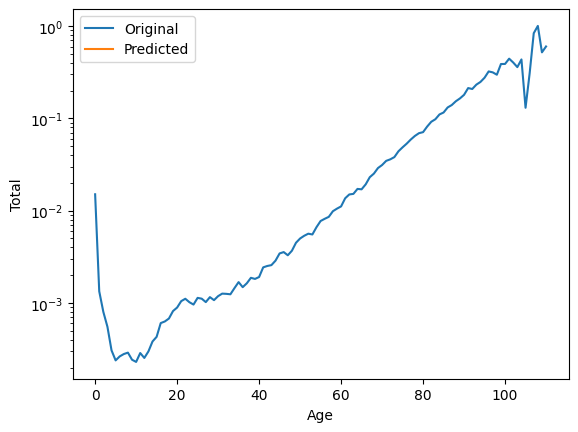

In [57]:
X = true_data[true_data.Year == 1992].Age.values
y_pred = func_(X)

sns.lineplot(data=true_data[true_data.Year == 1992], x="Age", y="Total", label="Original")
sns.lineplot(x=X, y=y_pred, label="Predicted")
plt.yscale("log")
plt.show()